<a href="https://colab.research.google.com/github/watanabe-gk/study_gpt/blob/main/Hugging%2BFace%E3%81%A6%E3%82%99%E7%A2%BA%E8%AA%8D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer
lm_head_model = GPT2LMHeadModel.from_pretrained('gpt2-medium')
tokenizer = GPT2Tokenizer.from_pretrained('gpt2-medium')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/718 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.52G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [ ]:
# @title 日本語モデル

# model_name = 'rinna/japanese-gpt2-medium'
# lm_head_model = GPT2LMHeadModel.from_pretrained(model_name)
# from transformers import T5Tokenizer
# tokenizer = T5Tokenizer.from_pretrained(model_name)

In [ ]:
# 入力テキスト
input_text = "This food is an apple . It tastes good ."

In [ ]:
# 入力テキストのエンコード
input_ids = tokenizer.encode(input_text, return_tensors='pt')

# モデルの実行とテキスト生成
output_sequences = lm_head_model.generate(input_ids=input_ids)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1375: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


In [ ]:
input_ids

tensor([[ 1212,  2057,   318,   281, 17180,   764,   632, 18221,   922,   764]])

In [ ]:
output_sequences

tensor([[ 1212,  2057,   318,   281, 17180,   764,   632, 18221,   922,   764,
           632,   338,   407,   588,   257,  1256,   286,   584, 22514,    13]])

In [ ]:
# 生成されたテキストのデコード
generated_text = tokenizer.decode(output_sequences[0], skip_special_tokens=True)
generated_text

"This food is an apple . It tastes good . It's not like a lot of other apples."

In [ ]:
from transformers import GPT2Model
# モデルのロード
model = GPT2Model.from_pretrained('gpt2-medium', output_attentions=True)

In [ ]:
# 入力テキストのエンコード
input_ids = tokenizer.encode(input_text, return_tensors='pt')
input_ids

tensor([[ 1212,  2057,   318,   281, 17180,   764,   632, 18221,   922,   764]])

In [ ]:
# モデルの実行と出力の取得
outputs = model(input_ids)
outputs

`GPT2SdpaAttention` is used but `torch.nn.functional.scaled_dot_product_attention` does not support `output_attentions=True` or `head_mask`. Falling back to the manual attention implementation, but specifying the manual implementation will be required from Transformers version v5.0.0 onwards. This warning can be removed using the argument `attn_implementation="eager"` when loading the model.


BaseModelOutputWithPastAndCrossAttentions(last_hidden_state=tensor([[[ 0.1479,  0.5771,  1.0948,  ..., -0.4213, -0.2610,  0.5123],
         [-0.0734,  0.8721,  0.8476,  ..., -1.2875, -0.6849, -0.3815],
         [ 0.5024,  0.1904,  0.3790,  ..., -0.0070,  0.0582, -0.1371],
         ...,
         [ 0.7458, -0.2388,  0.2736,  ..., -0.1134, -0.1592,  0.1543],
         [ 1.0922,  0.3505,  0.2816,  ..., -0.1840, -0.1773,  0.2552],
         [ 0.4687,  0.1483, -0.0801,  ..., -0.6830, -0.0595, -0.1927]]],
       grad_fn=<ViewBackward0>), past_key_values=((tensor([[[[ 3.5453e-01,  1.2820e-01,  2.6352e-01,  ..., -4.1431e-01,
            1.2373e-01, -7.6762e-02],
          [-2.2838e-02,  1.8675e-01, -1.1795e-01,  ...,  5.2314e-01,
           -1.8378e-01, -2.4690e-01],
          [ 1.1377e+00,  2.2951e-01,  3.3720e-01,  ...,  5.8215e-01,
            2.8135e-01, -3.8307e-01],
          ...,
          [-3.9970e-01,  1.6457e-01,  1.6097e-01,  ...,  4.4290e-01,
           -2.8811e-01,  9.8535e-03],
    

In [ ]:
# 出力のキーを確認
outputs.keys()

odict_keys(['last_hidden_state', 'past_key_values', 'attentions'])

In [ ]:
attentions = outputs.attentions
# attentionsの長さを確認
len(attentions)
# attentionsの中身を確認
attentions[0].shape

torch.Size([1, 16, 10, 10])

In [ ]:
#@title グラフ描画モジュールのインストール
!apt-get -y install fonts-ipafont-gothic
!pip install japanize-matplotlib
# !pip install -qq mecab-python3==1.0.8
# !pip install -qq unidic-lite
!git clone https://github.com/Michi-123/whiteGPT.git

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-ipafont-mincho
The following NEW packages will be installed:
  fonts-ipafont-gothic fonts-ipafont-mincho
0 upgraded, 2 newly installed, 0 to remove and 49 not upgraded.
Need to get 8,237 kB of archives.
After this operation, 28.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-ipafont-gothic all 00303-21ubuntu1 [3,513 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-ipafont-mincho all 00303-21ubuntu1 [4,724 kB]
Fetched 8,237 kB in 0s (18.4 MB/s)
Selecting previously unselected package fonts-ipafont-gothic.
(Reading database ... 123630 files and directories currently installed.)
Preparing to unpack .../fonts-ipafont-gothic_00303-21ubuntu1_all.deb ...
Unpacking fonts-ipafont-gothic (00303-21ubuntu1) ...
Selecting previously unselected package fonts-ipaf

In [ ]:
# 可視化モジュールの読み込み
from whiteGPT.utils.functions.visualize_attention_weights import visualize_attention_weights

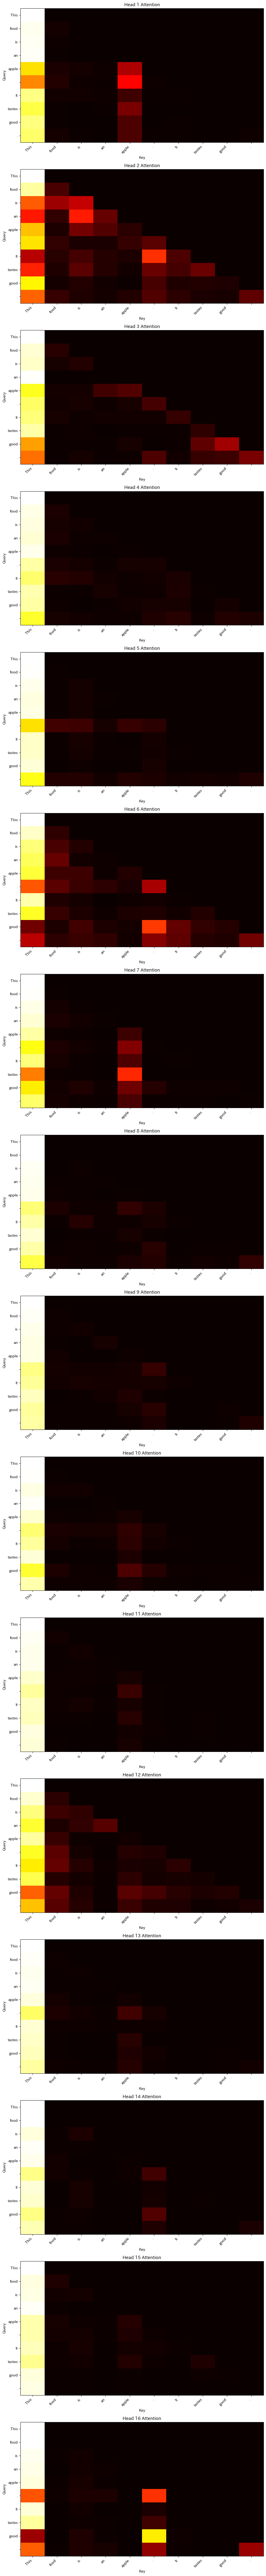

In [ ]:
# n番目のTransformerブロックの attention scoreを描画
n = 20
visualize_attention_weights(attentions[n][0].cpu(), input_text) # バッチの次元は除外